# Assignment 5 - Digit multiclass classification

## Requirements
    (1) Begin by fitting a random forest classifier using the full set of 784 explanatory variables and the model training set (train.csv). Record the time it takes to fit the model and then evaluate 
    the model on the test.csv data by submitting to Kaggle.com. Provide your Kaggle.com score and user ID.
    
    (2) Execute principal components analysis (PCA) on the combined training and test set data together, generating principal components that represent 95 percent of the variability in the explanator 
    variables. The number of principal components in the solution should be substantially fewer than the 784 explanatory variables. Record the time it takes to identify the principal components.
    
    (3) Using the identified principal components from step (2), use the train.csv to build another random forest classifier. Record the time it takes to fit the model and to evaluate the model on 
    the test.csv data by submitting to Kaggle.com. Provide your Kaggle.com score and user ID.

    (4) Submit both the RF Classifier and the PCA RF Classifier to Kaggle.com, and report both scores along with your user name.  I MUST have your user name to verify submission status.

    (5) The experiment we have proposed has a MAJOR design flaw. Identify the flaw. Fix it. Rerun the experiment in a way that is consistent with a training-and-test regimen, and submit this to 
    Kaggle.com. Provide your Kaggle.com score and user ID.

    (6)  Use k-means clustering to group MNIST observations into 1 of 10 categories and then assign labels. 

#### Report total elapsed time measures for the training set analysis.  It is sufficient to run a single time-elapsed test for this assignment. In practice, we might consider the possibility of repeated executions of the relevant portions of the programs, much as the Benchmark Example programs do. Some code that might help you with reporting elapsed total time follows. 

    start=datetime.now()
    rf2.fit(trainimages,labels)
    end=datetime.now()
    print(end-start)  

In [1]:

# import base packages into the namespace for this program
import numpy as np
import pandas as pd
from scipy import stats
from datetime import datetime

#diplay and plotting
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib import cm
import scikitplot as skplt
#import from SKlearn

from sklearn.ensemble import  RandomForestClassifier

 
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV

from sklearn.decomposition import PCA
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error, r2_score 

from sklearn.pipeline import Pipeline



# read data for the Boston Housing Study
Digit_input = pd.read_csv("C:/Users/bblank/Documents/Northwestern MSDS/datasets/Digits-Train.csv")
Digit_test = pd.read_csv("C:/Users/bblank/Documents/Northwestern MSDS/datasets/test.csv")
#sets random seed for entire notebook
RANDOM_SEED = 42

#kfold for CV of models
kfold = KFold(n_splits=5, random_state=RANDOM_SEED)
testkfold = KFold(n_splits=2, random_state=RANDOM_SEED)

In [2]:
#get counts of the labels, check for balance
Digit_input.label.value_counts().sort_values()

5    3795
8    4063
4    4072
0    4132
6    4137
2    4177
9    4188
3    4351
7    4401
1    4684
Name: label, dtype: int64

In [3]:
#splits into validation and train.
train, val =  train_test_split(Digit_input, test_size = 0.2, random_state = RANDOM_SEED)


y_train = train.label.copy()
X_train = train.drop('label', axis=1)




In [4]:
y_val = val.label.copy()
X_val = val.drop('label', axis=1)

In [5]:
print(train.label.value_counts())
print(val.label.value_counts())

1    3775
7    3508
3    3414
6    3352
9    3350
2    3331
0    3316
4    3233
8    3228
5    3093
Name: label, dtype: int64
3    937
1    909
7    893
2    846
4    839
9    838
8    835
0    816
6    785
5    702
Name: label, dtype: int64


In [6]:

print(X_train.columns)
print(y_train.name)

Index(['pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=784)
label


## (1) Begin by fitting a random forest classifier using the full set of 784 explanatory variables and the model training set (train.csv). 
    Record the time it takes to fit the model and then evaluate the model on the test.csv data by submitting to Kaggle.com. Provide your Kaggle.com score and user ID.

Forest_pipe = Pipeline([
        ('regressor', RandomForestClassifier(n_estimators = 50, max_depth=10, max_leaf_nodes =80,  random_state= RANDOM_SEED))
        ])

In [7]:
Forest_pipe = Pipeline([
        ('regressor', RandomForestClassifier(n_estimators = 50, max_depth=10, max_leaf_nodes =400,  random_state= RANDOM_SEED))
        ])
now = datetime.now()      
Forest_pipe.fit(X_train, y_train)
after_fit = datetime.now()

forest_Train_pred =Forest_pipe.predict(X_train)

In [8]:
#param_grid = dict(regressor__n_estimators=[50], regressor__max_depth= [10], regressor__max_leaf_nodes= [200,400])

#gForest_pipe = Pipeline([
#        ('regressor', RandomForestClassifier(n_jobs=-1))
#        ])



In [9]:
#grid_forest = GridSearchCV(gForest_pipe, param_grid, cv=10, verbose=1)
#grid_forest.fit(X_val, y_val)
#grid_forest.best_params_

In [10]:
elapsed = after_fit-now
Forest_elapsed = elapsed.total_seconds()

In [11]:
print(Forest_elapsed, 'seconds')

7.66243 seconds


<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

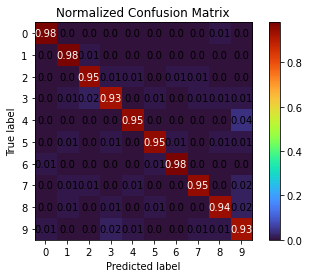

In [12]:
skplt.metrics.plot_confusion_matrix(y_train, forest_Train_pred, normalize=True, cmap='turbo')

<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

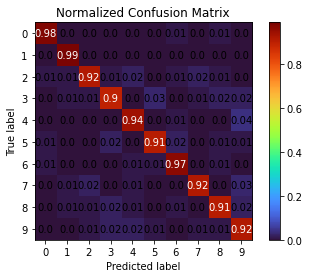

In [13]:
forest_val_pred =Forest_pipe.predict(X_val)
skplt.metrics.plot_confusion_matrix(y_val, forest_val_pred, normalize=True, cmap='turbo')

In [14]:
print(f"Classification report for classifier {Forest_pipe}:\n"
      f"{metrics.classification_report(y_val, forest_val_pred)}\n")

Classification report for classifier Pipeline(steps=[('regressor',
                 RandomForestClassifier(max_depth=10, max_leaf_nodes=400,
                                        n_estimators=50, random_state=42))]):
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       816
           1       0.96      0.99      0.97       909
           2       0.93      0.92      0.93       846
           3       0.93      0.90      0.91       937
           4       0.93      0.94      0.94       839
           5       0.93      0.91      0.92       702
           6       0.94      0.97      0.95       785
           7       0.95      0.92      0.93       893
           8       0.93      0.91      0.92       835
           9       0.88      0.92      0.90       838

    accuracy                           0.94      8400
   macro avg       0.94      0.94      0.94      8400
weighted avg       0.94      0.94      0.94      8400




In [15]:
test_label = Forest_pipe.predict(Digit_test)

len(test_label)

ImageId = np.linspace(1,28000,28000)

labels = pd.DataFrame({'ImageId' : ImageId, 'Label': test_label})


### Kaggle Summary

In [25]:
labels.to_csv('submission.csv' ,index=False)
userID = 'BEBlank'
score = 93.71
Forest_info = [userID, score, Forest_elapsed]

## (2) Execute principal components analysis (PCA) on the combined training and test set data together, generating principal components that represent 95 percent of the variability in the explanator variables. 
    The number of principal components in the solution should be substantially fewer than the 784 explanatory variables. Record the time it takes to identify the principal components.

## (3) Using the identified principal components from step (2), use the train.csv to build another random forest classifier. 
    Record the time it takes to fit the model and to evaluate the model on the test.csv data by submitting to Kaggle.com. Provide your Kaggle.com score and user ID.

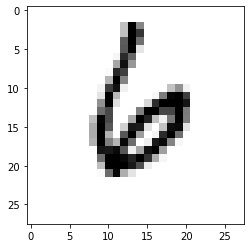

In [17]:
#gets first image and makes a plot of what the image is.
original = np.array(X_train.iloc[0, :])

original_image = original.reshape(28,28)
plt.imshow(original_image, cmap='binary')

In [18]:
pca = PCA(n_components=0.95)
now = datetime.now()
reduced = pca.fit_transform(X_train)
after = datetime.now()

elapsed = after-now
componentID_elapsed = elapsed.total_seconds()

In [19]:
components_95 = reduced.shape[1]

In [20]:
print('there are', components_95, 'components required to represent 95% of the variance')
print(componentID_elapsed, 'seconds were required to reduce the dimensionality')

there are 153 components required to represent 95% of the variance
2.956175 seconds were required to reduce the dimensionality


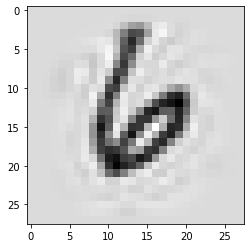

In [21]:
#decompress the digits after downselecting the principle components/ dimensions
recovered = pca.inverse_transform(reduced)
#gets the first decompressed digit and plots it
digit= recovered[0, :]
digit_image = digit.reshape(28,28)
plt.imshow(digit_image, cmap='binary')

In [29]:
param_grid = dict(regressor__n_estimators=[75,200], regressor__max_depth= [20,40], regressor__max_leaf_nodes= [400])

gForest_pipe = Pipeline([
        ('regressor', RandomForestClassifier(n_jobs=-1))
        ])


In [30]:
grid_forest = GridSearchCV(gForest_pipe, param_grid, cv=10, verbose=1)
grid_forest.fit(recovered, y_train)
grid_forest.best_params_

Fitting 10 folds for each of 4 candidates, totalling 40 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed: 12.8min finished


{'regressor__max_depth': 20,
 'regressor__max_leaf_nodes': 400,
 'regressor__n_estimators': 200}

In [31]:
recovered_pipe = Pipeline([
        ('regressor', RandomForestClassifier(n_estimators = 200, max_depth=20, max_leaf_nodes =400,  random_state= RANDOM_SEED))
        ])
before = datetime.now()      
recovered_pipe.fit(recovered, y_train)
after = datetime.now()

elapsed = after - before
recovered_elapsed = elapsed.total_seconds()

recovered_Train_pred =recovered_pipe.predict(recovered)

Classification report for classifier Pipeline(steps=[('regressor',
                 RandomForestClassifier(max_depth=20, max_leaf_nodes=400,
                                        n_estimators=200, random_state=42))]):
              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3316
           1       0.98      0.98      0.98      3775
           2       0.96      0.97      0.96      3331
           3       0.96      0.95      0.96      3414
           4       0.97      0.97      0.97      3233
           5       0.98      0.96      0.97      3093
           6       0.97      0.98      0.98      3352
           7       0.97      0.96      0.97      3508
           8       0.95      0.96      0.95      3228
           9       0.95      0.94      0.95      3350

    accuracy                           0.97     33600
   macro avg       0.97      0.97      0.97     33600
weighted avg       0.97      0.97      0.97     33600




<AxesSubplot:title={'center':'Normalized Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

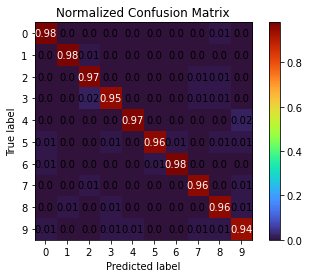

In [32]:
print(f"Classification report for classifier {recovered_pipe}:\n"
      f"{metrics.classification_report(y_train, recovered_Train_pred)}\n")

skplt.metrics.plot_confusion_matrix(y_train, recovered_Train_pred, normalize=True, cmap='turbo')

In [24]:
print(Forest_elapsed)
print(recovered_elapsed)

7.66243
34.428164
